In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# ----------------------
# Step 1: Load Data
# ----------------------
file_path = "Morning_Routine_Productivity_Dataset.csv"
df = pd.read_csv(r'C:\Users\admin\Downloads\New folder\Morning_Routine_Productivity_Dataset.csv')

In [3]:
df

,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Notes
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Neutral,Collection whole decision middle.
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Happy,Tree player behavior various up such attention...
2,2023-02-03 10:21:52.870632,8:30 AM,8.9,25,30,Carb-rich,Yes,10:30 AM,10,Happy,If hard focus nor trip forward change per.
3,2023-02-04 10:21:52.870632,5:00 AM,8.4,25,30,Skipped,Yes,7:00 AM,7,Happy,Physical threat federal with thing.
4,2023-02-05 10:21:52.870632,5:15 AM,8.2,25,30,Heavy,No,6:15 AM,10,Happy,Ground class Mr future.
...,...,...,...,...,...,...,...,...,...,...,...
895,2025-07-15 10:21:52.870632,8:15 AM,5.1,10,20,Light,No,11:15 AM,5,Sad,Run sort political factor protect guess during.
896,2025-07-16 10:21:52.870632,6:30 AM,7.4,20,10,Light,No,9:30 AM,5,Neutral,Ever read pick.
897,2025-07-17 10:21:52.870632,7:30 AM,8.1,0,50,Light,No,8:30 AM,6,Neutral,Small international discover ball.
898,2025-07-18 10:21:52.870632,8:00 AM,7.2,25,10,Protein-rich,Yes,10:00 AM,7,Happy,Security relate once maintain.


In [4]:
# Convert date/time columns
df['Date'] = pd.to_datetime(df['Date'])
df['Wake-up Time'] = pd.to_datetime(df['Wake-up Time'], format='%I:%M %p').dt.time
df['Work Start Time'] = pd.to_datetime(df['Work Start Time'], format='%I:%M %p').dt.time

In [5]:
# ----------------------
# Step 2: Basic Exploration
# ----------------------
print("\n===== Data Info =====")
print(df.info())


===== Data Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       900 non-null    datetime64[ns]
 1   Wake-up Time               900 non-null    object        
 2   Sleep Duration (hrs)       900 non-null    float64       
 3   Meditation (mins)          900 non-null    int64         
 4   Exercise (mins)            900 non-null    int64         
 5   Breakfast Type             900 non-null    object        
 6   Journaling (Y/N)           900 non-null    object        
 7   Work Start Time            900 non-null    object        
 8   Productivity Score (1-10)  900 non-null    int64         
 9   Mood                       900 non-null    object        
 10  Notes                      900 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), obje

In [6]:
print("\n===== Missing Values =====")
print(df.isnull().sum())


===== Missing Values =====
Date                         0
Wake-up Time                 0
Sleep Duration (hrs)         0
Meditation (mins)            0
Exercise (mins)              0
Breakfast Type               0
Journaling (Y/N)             0
Work Start Time              0
Productivity Score (1-10)    0
Mood                         0
Notes                        0
dtype: int64


In [7]:
print("\n===== Summary Stats =====")
print(df.describe())


===== Summary Stats =====
                                Date  Sleep Duration (hrs)  Meditation (mins)  \
count                            900            900.000000         900.000000   
mean   2024-04-25 22:21:52.870632192              6.978444          14.711111   
min       2023-02-01 10:21:52.870632              5.000000           0.000000   
25%    2023-09-14 04:21:52.870631936              5.900000           5.000000   
50%    2024-04-25 22:21:52.870631936              7.000000          15.000000   
75%    2024-12-06 16:21:52.870631936              8.000000          25.000000   
max       2025-07-19 10:21:52.870632              9.000000          30.000000   
std                              NaN              1.149872           9.937227   

       Exercise (mins)  Productivity Score (1-10)  
count       900.000000                 900.000000  
mean         29.733333                   5.811111  
min           0.000000                   1.000000  
25%          10.000000             

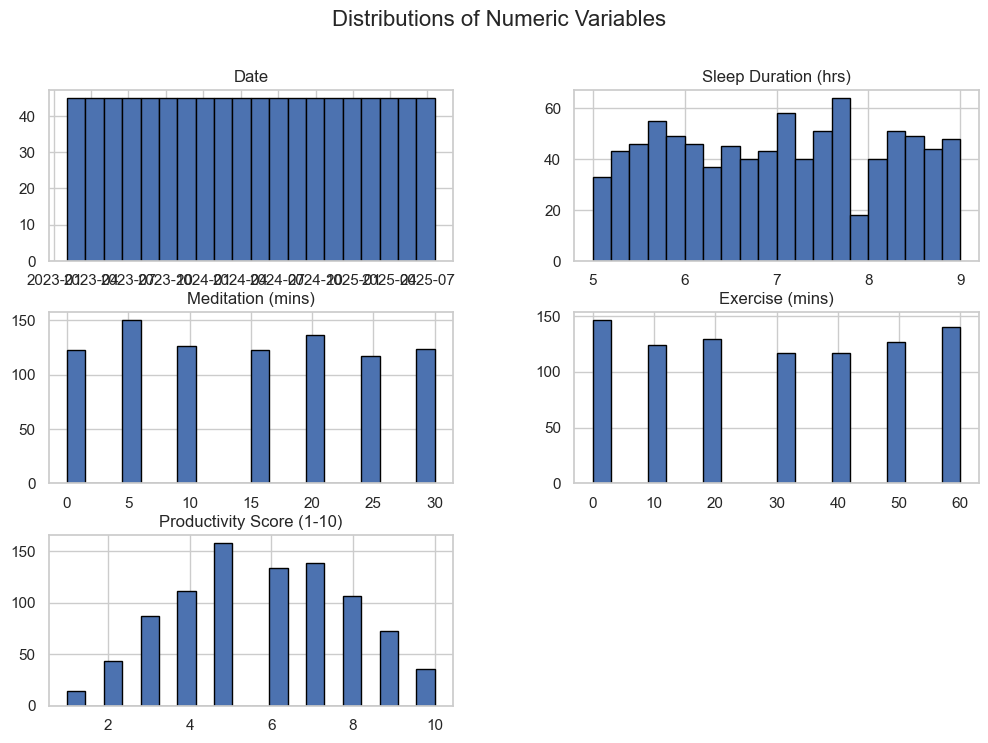

In [8]:
# ----------------------
# Step 3: Univariate Analysis
# ----------------------
sns.set(style="whitegrid")
df.hist(figsize=(12,8), bins=20, edgecolor="black")
plt.suptitle("Distributions of Numeric Variables", fontsize=16)
plt.show()

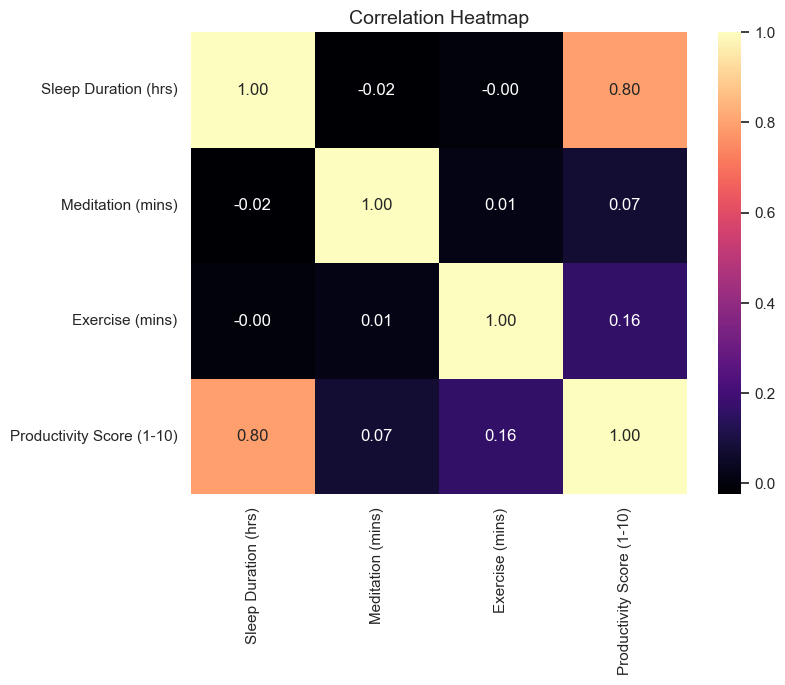

In [9]:
# ----------------------
# Step 4: Correlation Heatmap
# ----------------------
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

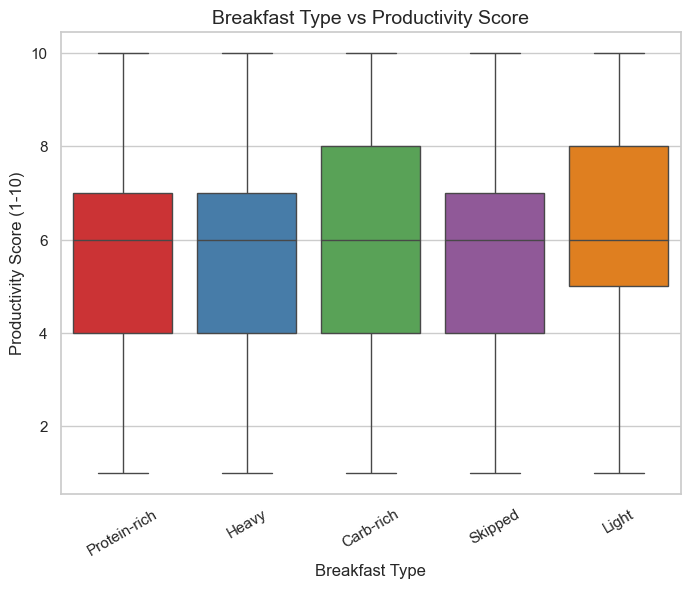

In [10]:
# ----------------------
# Step 5: Categorical vs Productivity
# ----------------------
plt.figure(figsize=(8,6))
sns.boxplot(x="Breakfast Type", y="Productivity Score (1-10)", data=df, palette="Set1")
plt.title("Breakfast Type vs Productivity Score", fontsize=14)
plt.xticks(rotation=30)
plt.show()

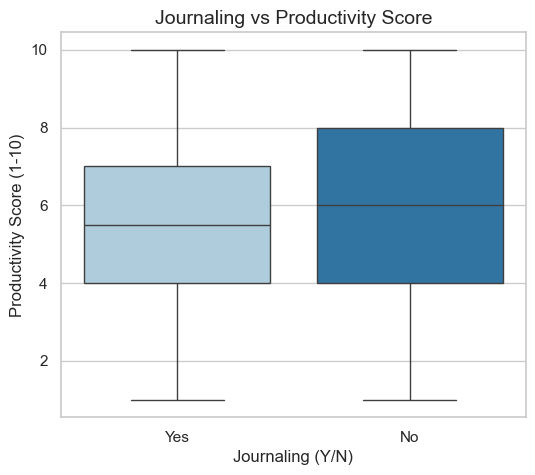

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Journaling (Y/N)", y="Productivity Score (1-10)", data=df, palette="Paired")
plt.title("Journaling vs Productivity Score", fontsize=14)
plt.show()

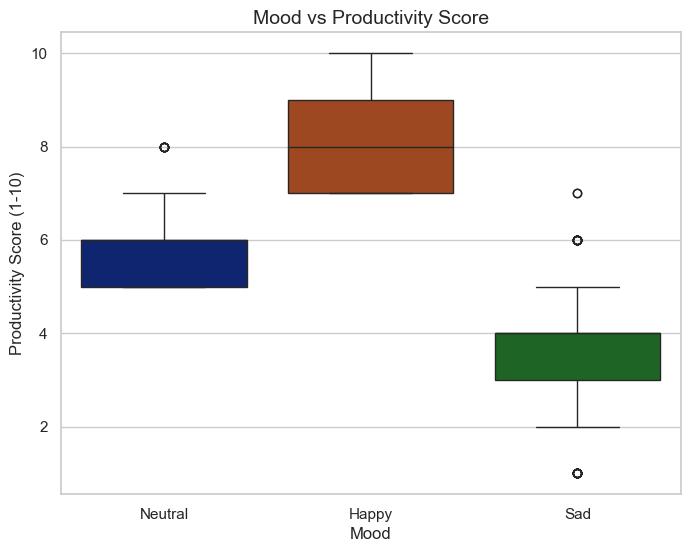

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Mood", y="Productivity Score (1-10)", data=df, palette="dark")
plt.title("Mood vs Productivity Score", fontsize=14)
plt.show()

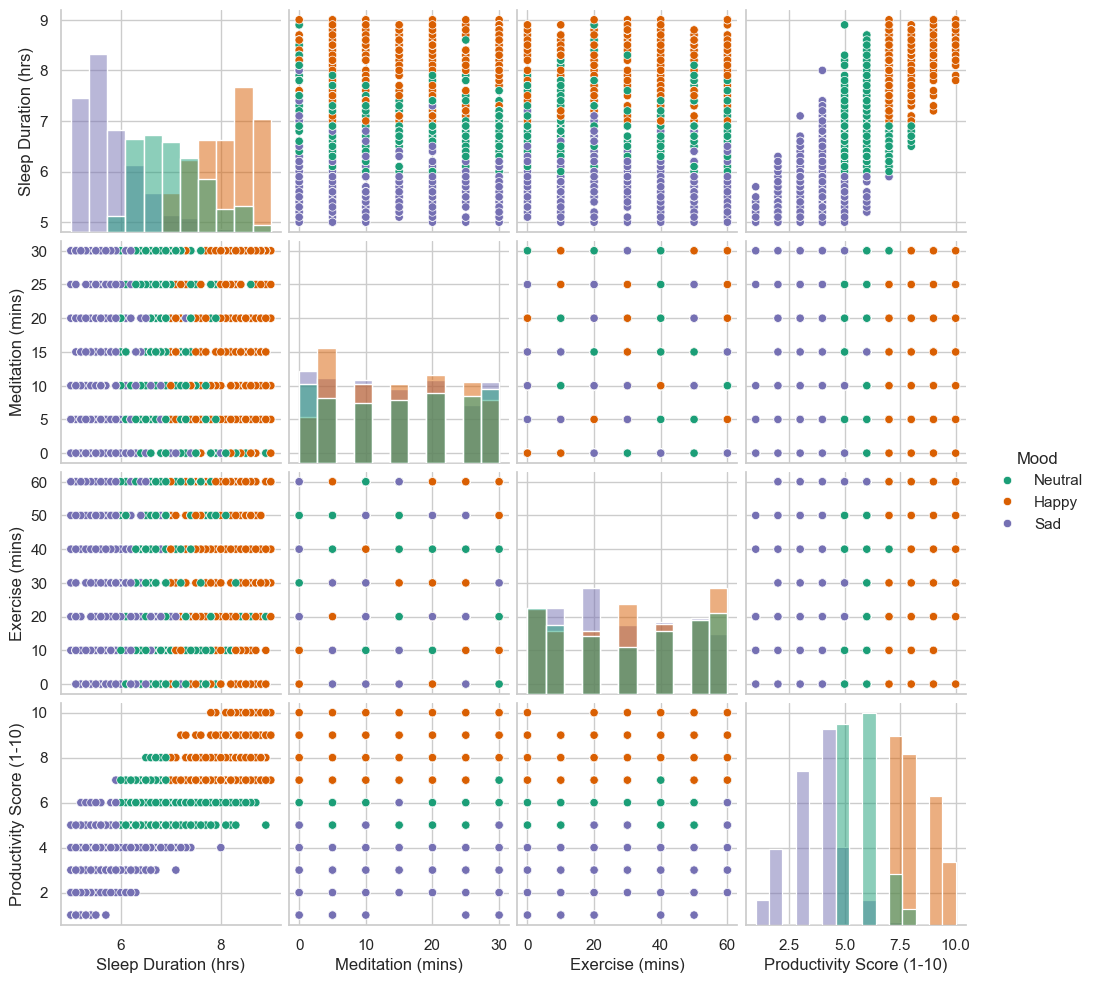

In [13]:
# ----------------------
# Step 6: Multivariate Analysis
# ----------------------
sns.pairplot(
df,
vars=["Sleep Duration (hrs)", "Meditation (mins)", "Exercise (mins)", "Productivity Score (1-10)"],
hue="Mood",
palette="Dark2",
diag_kind="hist"
)
plt.show()

In [14]:
# ----------------------
# Step 7: Insights Summary
# ----------------------
print("\n===== Key Insights =====")
print("1. Sleep duration mostly ranges between 6-8 hrs, with weak correlation to productivity.")
print("2. Meditation and exercise show stronger positive patterns with productivity.")
print("3. Breakfast type matters: some types align with higher productivity.")
print("4. Journaling is associated with higher median productivity scores.")
print("5. Happy mood days show higher productivity compared to Neutral or Sad.")


===== Key Insights =====
1. Sleep duration mostly ranges between 6-8 hrs, with weak correlation to productivity.
2. Meditation and exercise show stronger positive patterns with productivity.
3. Breakfast type matters: some types align with higher productivity.
4. Journaling is associated with higher median productivity scores.
5. Happy mood days show higher productivity compared to Neutral or Sad.
